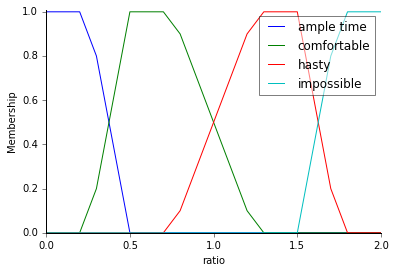

In [4]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# antecedent 
ratio = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'ratio')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
ratio['ample time'] = fuzz.trapmf(ratio.universe, [0, 0, 0.25, 0.5])
ratio['comfortable'] = fuzz.trapmf(ratio.universe, [0.25, 0.5, 0.75, 1.25])
ratio['hasty'] = fuzz.trapmf(ratio.universe, [0.75, 1.25, 1.5, 1.75])
ratio['impossible'] = fuzz.trapmf(ratio.universe, [1.5, 1.75, 2, 2])
ratio.view()

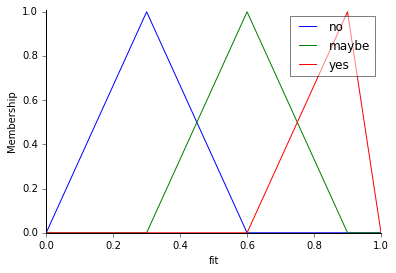

In [12]:
# antecedent 
fit = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'fit')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
fit['no'] = fuzz.trimf(fit.universe, [0, 0.3, 0.6])
fit['maybe'] = fuzz.trimf(fit.universe, [0.3, 0.6, 0.9])
fit['yes'] = fuzz.trimf(fit.universe, [0.6, 0.9, 1])
fit.view()

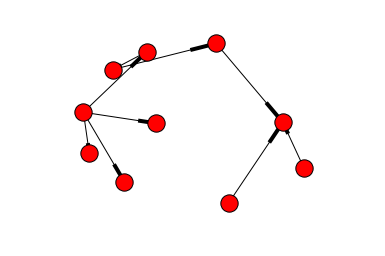

In [13]:
rule1 = ctrl.Rule(ratio['impossible'], fit['no'])
rule2 = ctrl.Rule(ratio['hasty'], fit['maybe'])
rule3 = ctrl.Rule(ratio['comfortable'], fit['yes'])
rule4 = ctrl.Rule(ratio['ample time'], fit['yes'])

rule1.view()

0.6


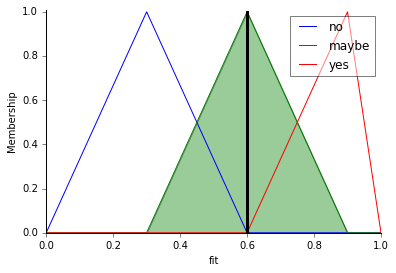

In [20]:
fit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fitting = ctrl.ControlSystemSimulation(fit_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
fitting.input['ratio'] = 1.5

# Crunch the numbers
fitting.compute()
print fitting.output['fit']
fit.view(sim=fitting)